# Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:




где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

    Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
    Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
    Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
    Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).






In [9]:
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\siarhei_sintsou\Anaconda3\envs\mipt_ml\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
def f(x: np.array) -> np.array:
    return np.sin(x/5.0) * np.exp(x/10.0) + 5*np.exp(-x/2.0)

In [94]:
X = np.arange(1, 15.1, 0.01, dtype=float)
Y = f(X)

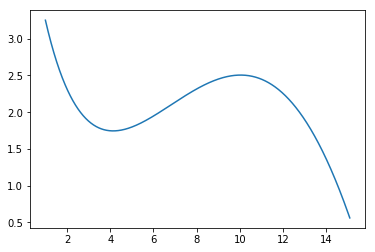

In [95]:
plot(X,Y)

In [19]:
a1 = np.array([[1,  1], 
               [15, 1]])
b1 = np.array([f(1), f(15)])
x1 = np.linalg.solve(a1, b1)

In [45]:
print(a1)
print(b1)

[[ 1  1]
 [15  1]]
[3.25221687 0.63522142]


In [21]:
a1.dot(x1)

array([3.25221687, 0.63522142])

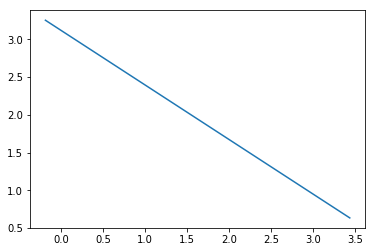

In [25]:
plot(x1,b1)

In [72]:
n2  = 2
p2 = [1, 8, 15]
a2 = np.power(np.array([p2]).T, list(range(0, n2+1)))
b2 = f(np.array(p2))
x2 = np.linalg.solve(a2, b2)

In [44]:
print(a2)
print(b2)

[[  1   1   1]
 [  1   8  64]
 [  1  15 225]]
[3.25221687 2.31617016 0.63522142]


In [46]:
a2.dot(x2)

array([3.25221687, 2.31617016, 0.63522142])

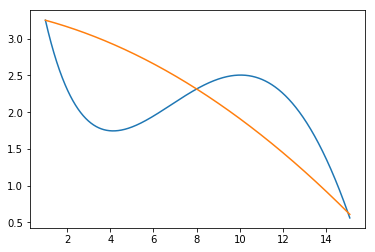

In [96]:
Y2 = np.power(np.array([X]).T, list(range(0, n2+1))).dot(x2.reshape(len(x2), 1))

plot(X,Y, X, Y2.reshape(1, len(X)).flatten(), '-')

In [76]:
n3  = 3
p3 = [1, 4, 10, 15]
a3 = np.power(np.array([p3]).T, list(range(0, n3+1)))
b3 = f(np.array(p3))
x3 = np.linalg.solve(a3, b3)

In [79]:
print(a3)
print(b3)

[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
[3.25221687 1.74684595 2.50541641 0.63522142]


In [92]:
a3.dot(x3.T)

array([3.25221687, 1.74684595, 2.50541641, 0.63522142])

In [93]:
x3.T

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

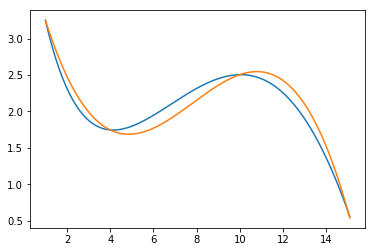

In [97]:
Y3 = np.power(np.array([X]).T, list(range(0, n3+1))).dot(x3.reshape(len(x3), 1))

plot(X,Y, X, Y3.reshape(1, len(X)).flatten(), '-')

Коэффициенты многочлена равны [4.36264154 -1.29552587  0.19333685 -0.00823565]